In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Customer_Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
column=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS','MINIMUM_PAYMENTS']

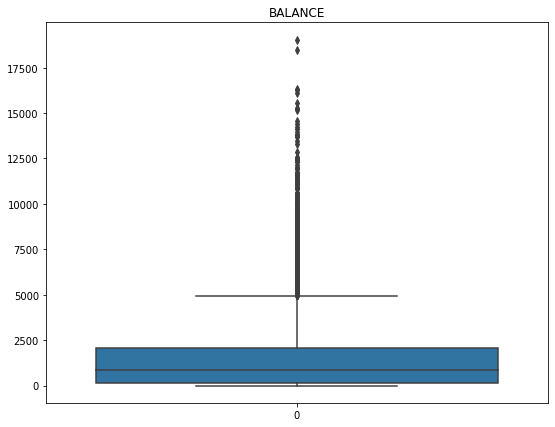

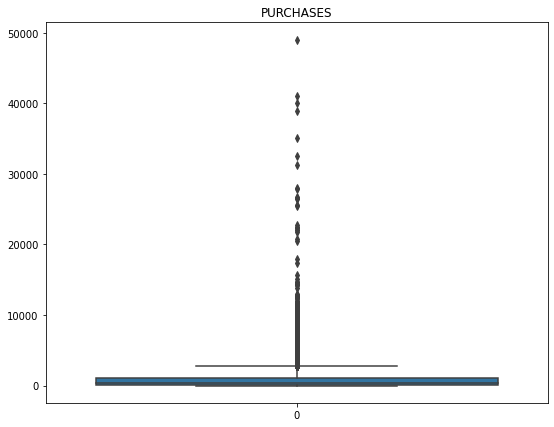

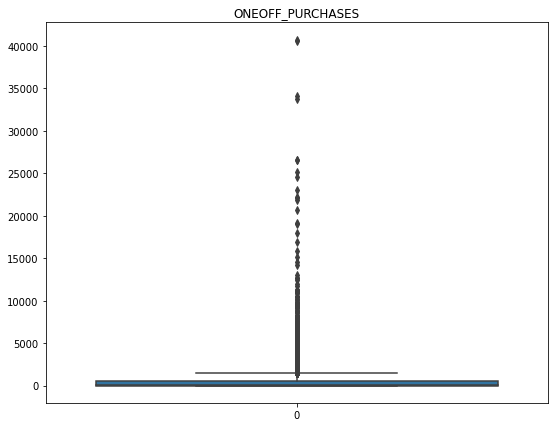

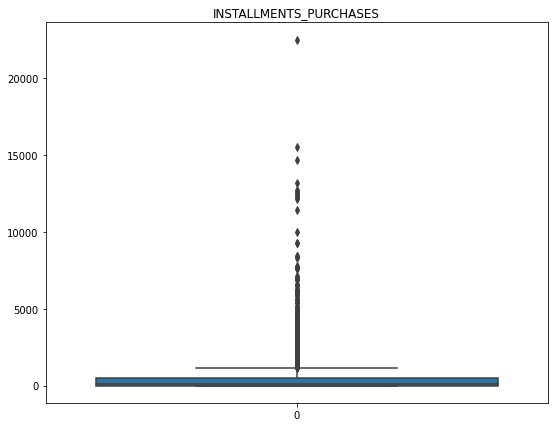

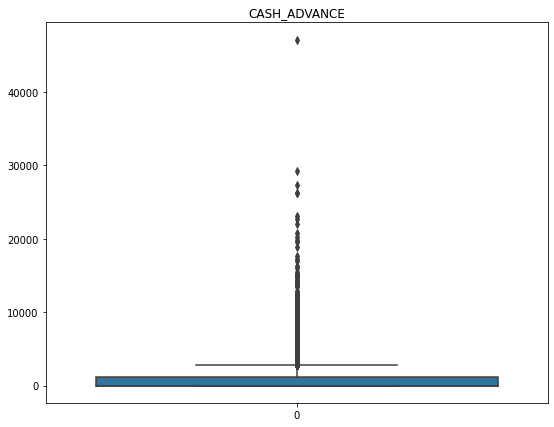

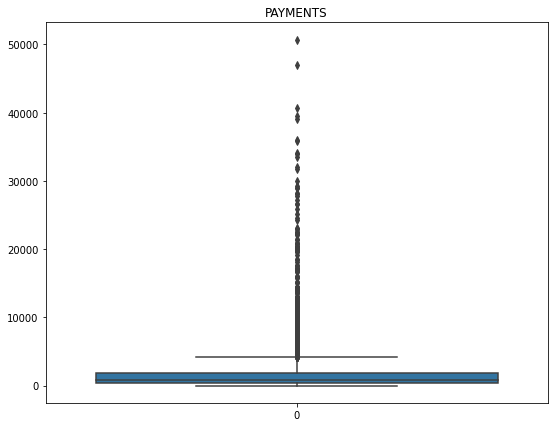

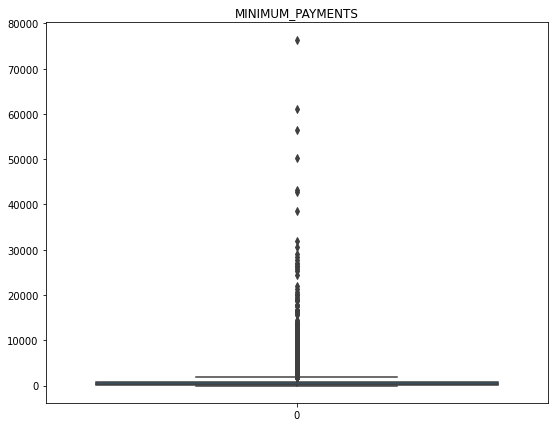

In [11]:
for i in column:
    plt.figure(figsize=(9,7))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [13]:
df[df['BALANCE']>4800].shape

(736, 18)

In [14]:
df=df[df['BALANCE']<4800]

In [17]:
df[df['PURCHASES']>2500].shape

(760, 18)

In [18]:
df=df[df['PURCHASES']<2500]

In [21]:
df[df['ONEOFF_PURCHASES']>1500].shape

(233, 18)

In [22]:
df=df[df['ONEOFF_PURCHASES']<1500]

In [26]:
df[df['INSTALLMENTS_PURCHASES']>1200].shape

(301, 18)

In [27]:
df=df[df['INSTALLMENTS_PURCHASES']<1200]

In [29]:
df[df['CASH_ADVANCE']>2000].shape

(890, 18)

In [31]:
df=df[df['CASH_ADVANCE']<2000]

In [33]:
df[df['PAYMENTS']>5000].shape

(74, 18)

In [34]:
df=df[df['PAYMENTS']<5000]

In [36]:
df[df['MINIMUM_PAYMENTS']>1500].shape

(297, 18)

In [37]:
df=df[df['MINIMUM_PAYMENTS']<1500]

In [38]:
df.shape

(5387, 18)

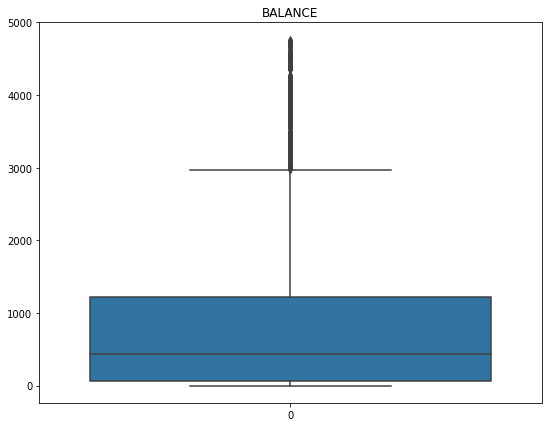

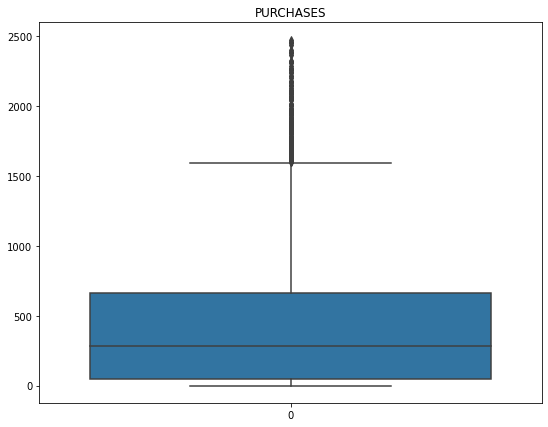

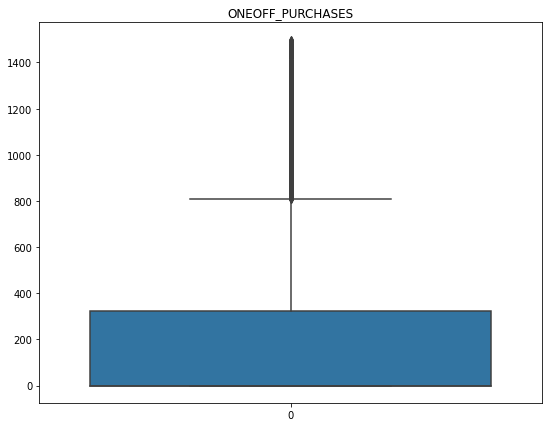

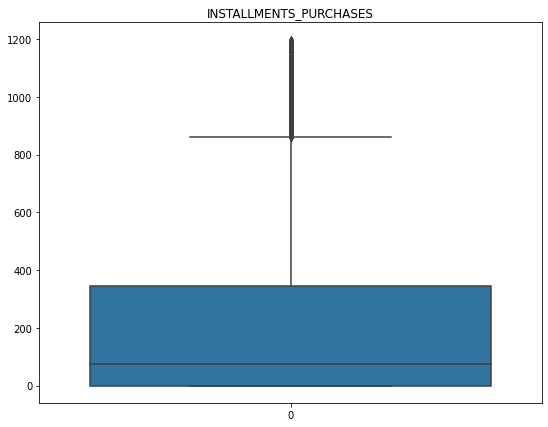

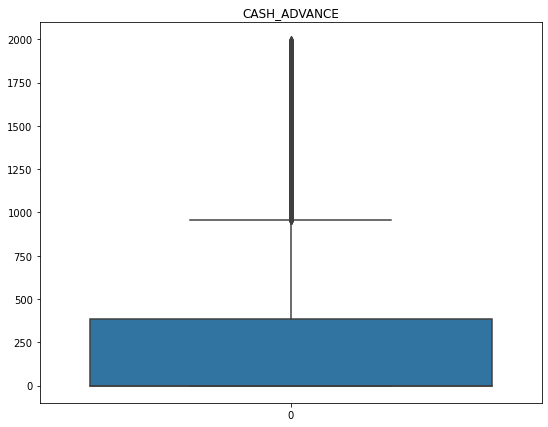

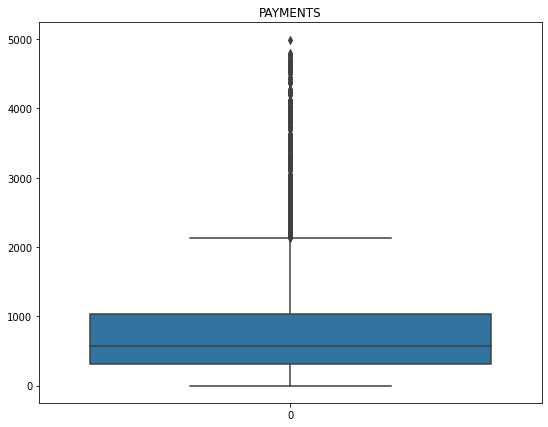

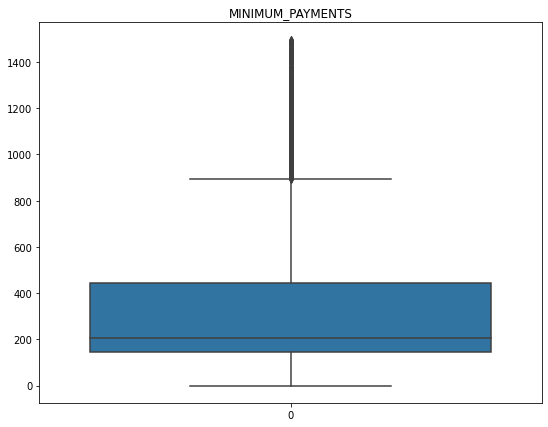

In [39]:
for i in column:
    plt.figure(figsize=(9,7))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [42]:
df[df['BALANCE']>2900].shape

(212, 18)

In [43]:
df=df[df['BALANCE']<2900]

In [45]:
df[df['PURCHASES']>1600].shape

(143, 18)

In [46]:
df=df[df['PURCHASES']<1600]

In [48]:
df[df['ONEOFF_PURCHASES']>750].shape

(461, 18)

In [49]:
df=df[df['ONEOFF_PURCHASES']<750]

In [50]:
df[df['INSTALLMENTS_PURCHASES']>850].shape

(183, 18)

In [51]:
df=df[df['INSTALLMENTS_PURCHASES']<850]

In [52]:
df[df['CASH_ADVANCE']>850].shape

(727, 18)

In [53]:
df.shape

(4386, 18)

In [54]:
df=df[df['CASH_ADVANCE']<850]

In [55]:
df[df['PAYMENTS']>2000].shape

(117, 18)

In [56]:
df=df[df['PAYMENTS']<2000]

In [58]:
df[df['MINIMUM_PAYMENTS']>850].shape

(184, 18)

In [60]:
df=df[df['MINIMUM_PAYMENTS']<850]

In [61]:
df.shape

(3358, 18)

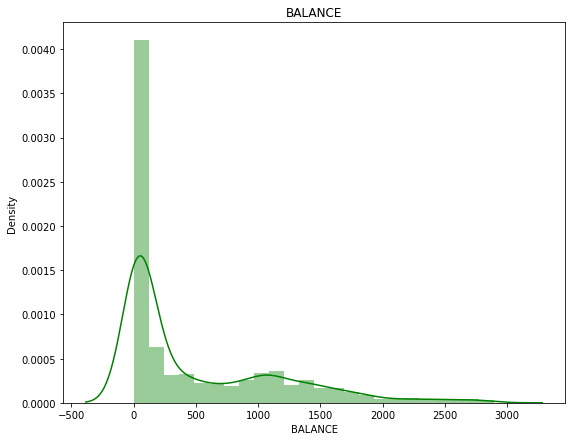

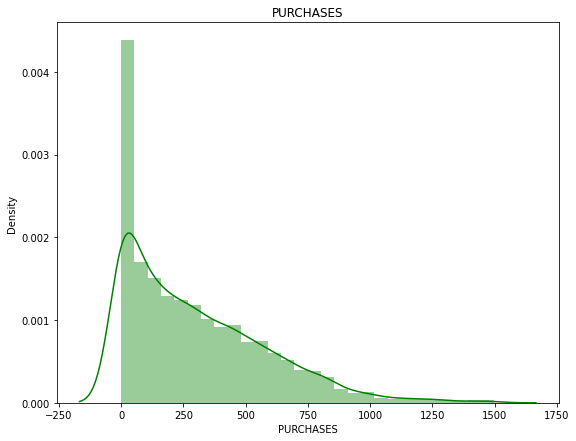

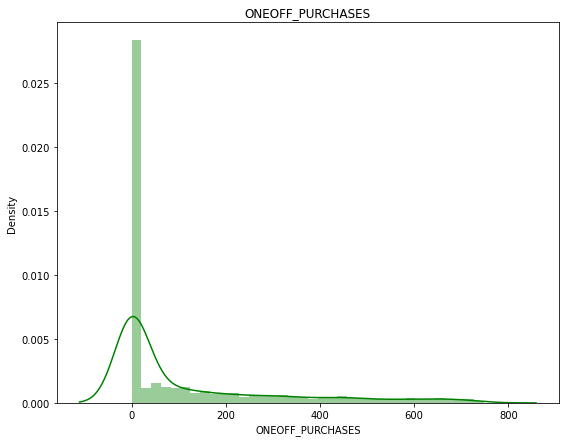

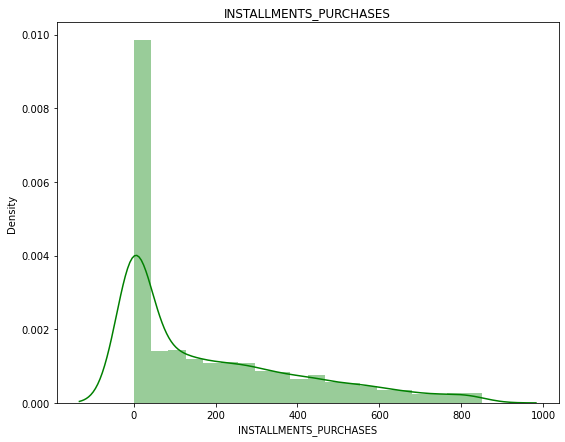

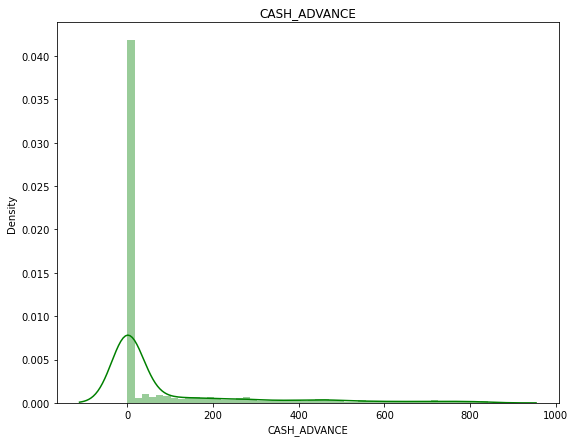

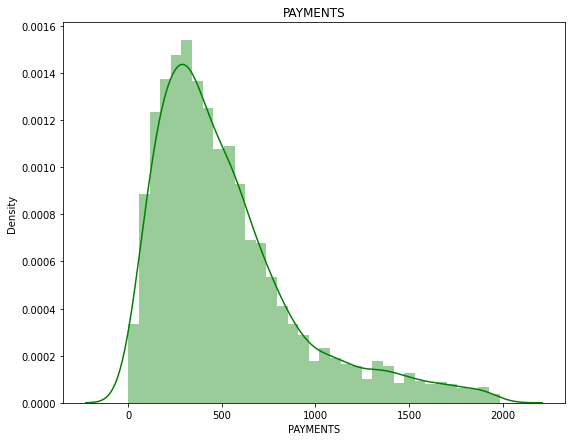

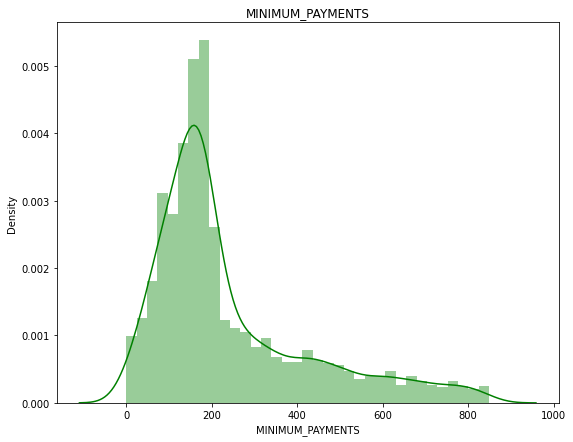

In [64]:
for i in column:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],color='green')
    plt.title(i)
    plt.show()

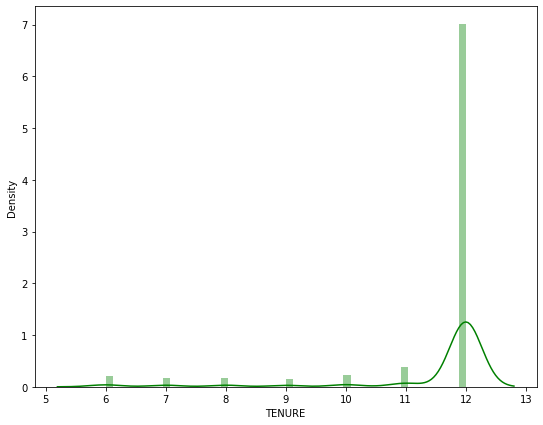

In [65]:
plt.figure(figsize=(9,7))
sns.distplot(df['TENURE'],color='green')
plt.show()

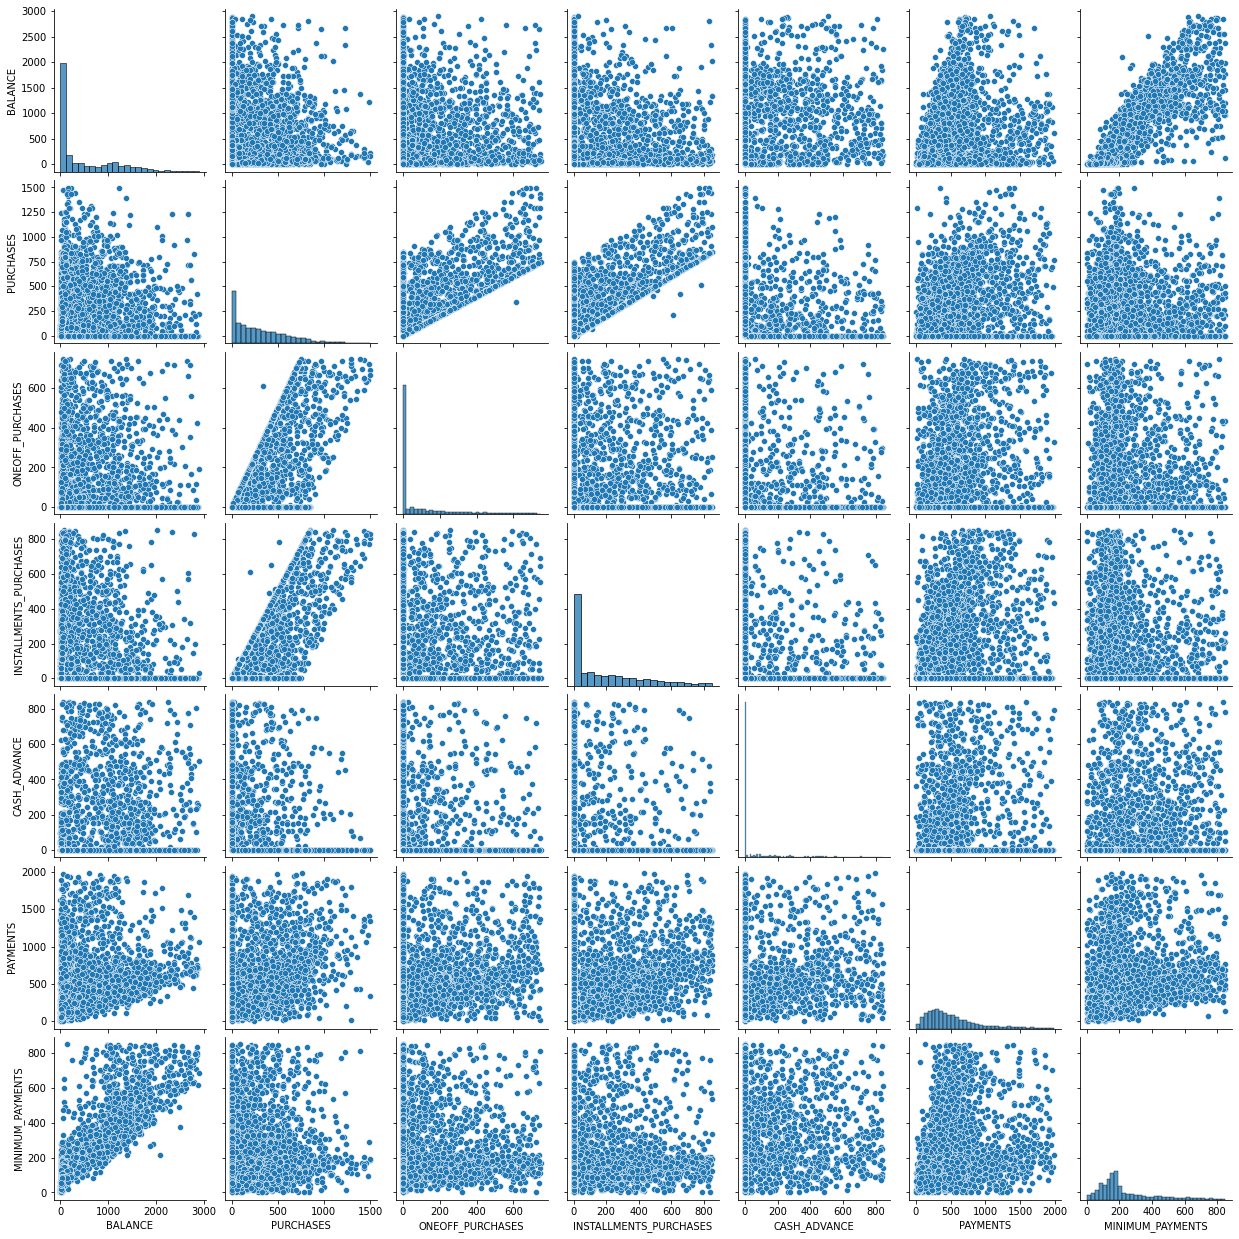

In [67]:
sns.pairplot(df[column])
plt.show()

In [68]:
cols=['BALANCE','PURCHASES']
scaler=StandardScaler()
df[cols]=scaler.fit_transform(df[cols])

In [69]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3974,C14085,0.862133,1.0,-1.060981,0.00,0.00,215.632774,0.000000,0.000000,0.000000,0.250000,6,0,1200.0,222.800881,263.186377,0.000000,12
3899,C14009,-0.728770,1.0,0.321565,0.00,391.50,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,6500.0,405.250915,162.812944,0.727273,12
8817,C19057,-0.752549,1.0,-0.584241,0.00,135.00,0.000000,1.000000,0.000000,0.888889,0.000000,0,9,1000.0,82.451537,132.188181,0.000000,9
6199,C16372,-0.006644,1.0,1.070082,328.68,274.78,0.000000,0.583333,0.333333,0.416667,0.000000,0,13,1200.0,233.768374,353.463494,0.000000,12
35,C10036,1.769099,1.0,-1.060981,0.00,0.00,99.264367,0.000000,0.000000,0.000000,0.083333,1,0,1800.0,351.500199,634.569311,0.000000,12


In [70]:
inertia_score=[]
for i in range (1,11):
    model=KMeans(n_clusters=i,init='k-means++',n_init=10)
    model.fit(df[['BALANCE','PURCHASES']])
    inertia_score.append(model.inertia_)

In [71]:
inertia_score

[6716.00000000001,
 3856.364515934096,
 2066.480484807567,
 1632.4850011951653,
 1292.5311939723244,
 1022.4220227450035,
 849.497398017688,
 749.6741029927123,
 654.9596258362918,
 570.3432704619468]

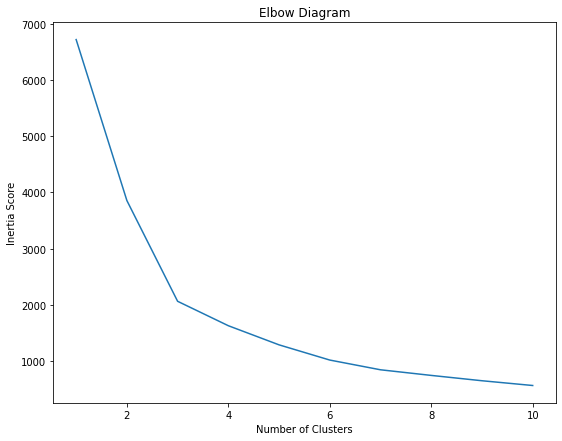

In [72]:
plt.figure(figsize=(9,7))
plt.plot(range(1,11),inertia_score)
plt.title('Elbow Diagram')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()

In [74]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10)
y_predict=kmeans.fit_predict(df[['BALANCE','PURCHASES']])
y_predict

array([1, 2, 2, ..., 1, 1, 1])

In [75]:
df['Clusters']=y_predict

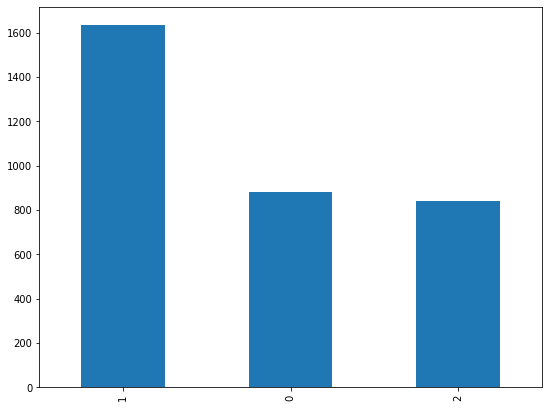

In [76]:
plt.figure(figsize=(9,7))
df['Clusters'].value_counts().plot(kind='bar')
plt.show()

In [78]:
df0=df[df['Clusters']==0]
df1=df[df['Clusters']==1]
df2=df[df['Clusters']==2]

In [79]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,C10001,-0.716465,0.818182,-0.724085,0.00,95.4,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.00,12,1
4,C10005,0.478756,1.000000,-1.004478,16.00,0.0,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.00,12,2
7,C10008,2.026513,1.000000,0.479419,0.00,436.2,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,2
8,C10009,0.782190,1.000000,1.981291,661.49,200.0,0.0,0.333333,0.083333,0.250000,0.0,0,5,7000.0,688.278568,311.963409,0.00,12,0
17,C10018,-0.716175,0.454545,0.771820,0.00,519.0,0.0,0.416667,0.000000,0.333333,0.0,0,8,2500.0,254.590662,73.203221,0.25,12,0


In [83]:
centroids=pd.DataFrame(kmeans.cluster_centers_,columns=['x','y'])
centroids

,x,y
0,-0.274046,1.350666
1,-0.602036,-0.410987
2,1.458223,-0.615414


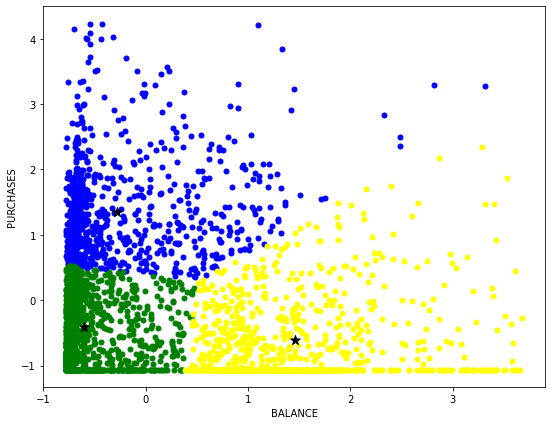

In [86]:
plt.figure(figsize=(9,7))
plt.scatter(df0['BALANCE'],df0['PURCHASES'],s=25,color='blue',label='Cluster 0')
plt.scatter(df1['BALANCE'],df1['PURCHASES'],s=25,color='green',label='Cluster 1')
plt.scatter(df2['BALANCE'],df2['PURCHASES'],s=25,color='yellow',label='Cluster 2')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.scatter(centroids['x'],centroids['y'],s=100,marker='*',color='black')
plt.show()